# Sieci neuronowe - prolog

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

In [2]:
data = np.loadtxt('SGD_data.txt', delimiter=',')
Y = data[:, 0]
X = np.array([(x-32)*5/9 for x in data[:, 1]])

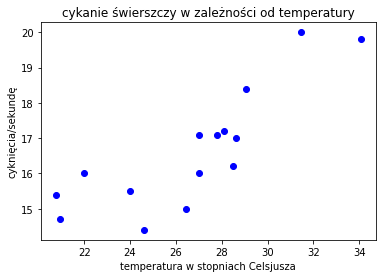

In [3]:
plt.scatter(X, Y, marker='o', c='b')
plt.title('cykanie świerszczy w zależności od temperatury')
plt.ylabel('cyknięcia/sekundę')
plt.xlabel('temperatura w stopniach Celsjusza')
plt.show()

In [4]:
samples_cnt = len(X)
weight0 = 10.0 # inicjalizacja wag
weight1 = 10.0 #
learning_rate = 0.001 #rozmiar stałej uczenia
maxIteration = 1000 #liczba iteracji

**Zadanie 1: uzupełnij listę wartości tak, aby dla każdej temperatury wyznaczyć liczbę cyknięć świerszczy przy użyciu aktualnych wag modelu liniowego**

**Zadanie 2: napisz kod, który iteracyjnie będzie poprawiać wagi, by wyznaczyły model najlepiej odwzorowujący zależność liczby cyknięć od temperatury**

In [24]:
a_list = []
b_list = []
y_list = []
for i in range(maxIteration):
    #Zadanie1: 
    predicted_values = X*weight1+weight0
    
    #Zadanie2:
    weight0 -= learning_rate 
    weight1 -= learning_rate
    
    #dodanie wartości do list w celu późniejszej wizualizacji
    a_list.append(weight1)
    b_list.append(weight0)
    y_list.append(mean_squared_error(Y, predicted_values))

In [25]:
y_list

[31957.328034032085,
 31947.34604732878,
 31937.365619893808,
 31927.386751727136,
 31917.409442828775,
 31907.433693198727,
 31897.45950283699,
 31887.48687174358,
 31877.515799918467,
 31867.546287361674,
 31857.578334073198,
 31847.611940053026,
 31837.64710530117,
 31827.683829817626,
 31817.722113602387,
 31807.761956655482,
 31797.80335897687,
 31787.846320566583,
 31777.8908414246,
 31767.93692155093,
 31757.984560945562,
 31748.033759608537,
 31738.084517539806,
 31728.136834739395,
 31718.19071120728,
 31708.24614694349,
 31698.30314194801,
 31688.361696220843,
 31678.421809762,
 31668.483482571453,
 31658.546714649226,
 31648.611505995308,
 31638.67785660971,
 31628.74576649242,
 31618.815235643448,
 31608.88626406279,
 31598.958851750427,
 31589.032998706392,
 31579.108704930662,
 31569.185970423256,
 31559.264795184154,
 31549.34517921337,
 31539.427122510897,
 31529.51062507673,
 31519.59568691088,
 31509.682308013336,
 31499.77048838412,
 31489.86022802321,
 31479.9515269

### Zobaczmy jak wygląda ostateczna prosta i jak wyglądała aktualizacja wag

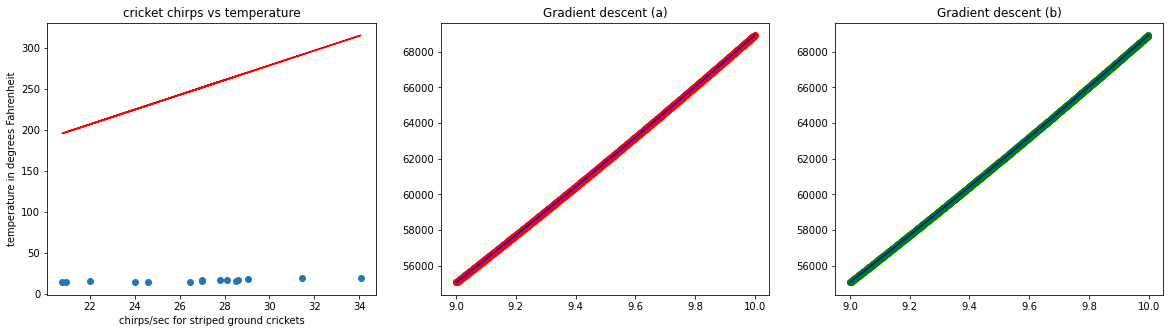

Computed weights values -> w0: 9.000000000000554 w1: 9.000000000000554


In [6]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.plot(X, Y, "o")
if len(predicted_values) > 0:
    plt.plot(X, predicted_values, "r-")
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.subplot(1,3,2)
plt.scatter(a_list,y_list,c="r")
plt.plot(a_list,y_list,c="b")
plt.title("Gradient descent (a)")
plt.subplot(1,3,3)
plt.scatter(b_list,y_list,c="g")
plt.plot(b_list,y_list,c="b")
plt.title("Gradient descent (b)")
plt.show()
print("Computed weights values -> w0:", weight0, "w1:", weight1)

**Zadanie 3. Tensorflow Playground**

**Zajrzyj na stronę [playground.tensorflow.org](http://playground.tensorflow.org).**

**Ustaw minimalną sieć o zerowej liczbie warstw ukrytych (0 hidden layers; nie zmieniaj kolumny features) i naucz ją na problemie nr 3 (dwie grupy) - spójrz na wizualizację i wykres błędu treningowego i testowego - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? Zmień problem na pierwszy i naucz sieć jeszcze raz - na czym polega różnica i dlaczego? Jak sprawić by efekt znów był zadowalający?**

Sieć nauczyła się odpowiedniej granicy decyzyjnej na zbiorze danych nr 3, ale nie poradziła sobie ze zbiorem danych nr 1, Róznica polega na tym, że w przypdaku zbioru nr 3 wystarczy funkcja liniowa, w przypadku zbioru nr 1 problem jest bardziej złożony, efekt możemy poprawić poprzez dodanie 2 warstw ukrytych: pierwszej z 4 neuronami, drugiej z 2 neuronami

**Zadanie 4. Po przeczytaniu dokumentacji biblioteki scikit-learn stwórz klasyfikatory regresji logistycznej (Logistic Regression) oraz MLP (Multi-Layer Perceptron), naucz je na podstawie zbioru digits i użyj do rozpoznawania cyfr w zbiorze  testowym, etykiety umieść w zmiennych predicted_logreg i predicted_mlp. Spróbuj doprowadzić do momentu w którym regresja logistyczna osiągnie lepszy wynik niż MLP. Wyjaśnij dlaczego to trudne, nawiązując do metody działania tych algorytmów**

Może być trudne ponieważ model MLPClassifier jest modelem sieci neuronowych a model LogisticRegression jest prostym modelem liniowym. Poprzez gridSearcha możemy jednak znaleźć odpowiednie hiperparametry.

C:\Users\Marcin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.5s finished


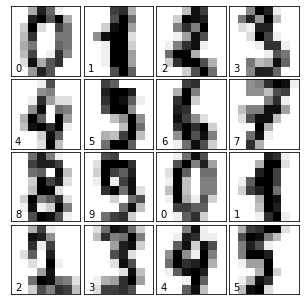

In [21]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import numpy as np

#%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9
fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#wyświetlanie 16 obrazków z ich etykietami
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

#deklaracja
mlp = MLPClassifier()
logreg = LogisticRegression()

#uczenie
mlp.fit(X_train, y_train)
logreg.fit(X_train, y_train)

#Regresja logistyczna grid search
pipe = Pipeline([('classifier' , LogisticRegression())])

params_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'elasticnet'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

grid = GridSearchCV(pipe, params_grid,verbose = 2, cv=3, n_jobs = -1, refit = True,)

grid.fit(X_train, y_train)


#prognoza
predicted_logreg = logreg.predict(X_test)
predicted_mlp = mlp.predict(X_test)
predicted_grid = grid.predict(X_test)

[[33  0  1  0  0  1  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  2 33  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  1  0 41  1  0]
 [ 0  1  0  0  0  2  0  1 32  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
[[34  0  1  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  1 28  0  0  1  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  1  1  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


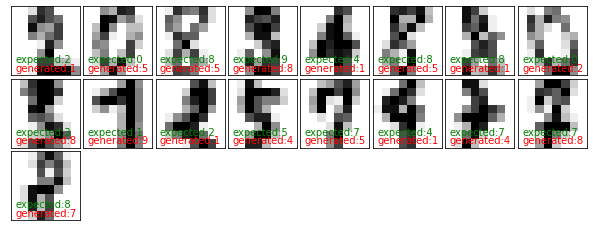

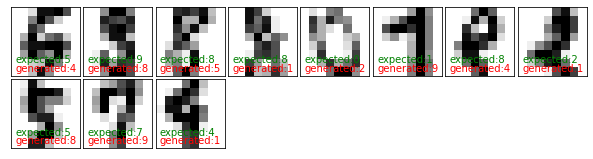

In [19]:
if predicted_logreg is not None:
    print(confusion_matrix(y_test,predicted_logreg))
    expected = y_test
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_logreg[i] != expected[i]:
            ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            ax.text(0, 7, "generated:" + str(predicted_logreg[i]), color='red')
            ax.text(0, 6, "expected:" + str(expected[i]), color='green')
            
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):    
        if predicted_mlp[i] != expected[i]:
            bx = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            bx.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            bx.text(0, 7, "generated:" + str(predicted_mlp[i]), color='red')
            bx.text(0, 6, "expected:" + str(expected[i]), color='green')
    print(confusion_matrix(y_test,predicted_mlp))

In [23]:
from sklearn.metrics import accuracy_score

mlp_accuracy = accuracy_score(y_test, predicted_mlp)
logreg_accuracy = accuracy_score(y_test, predicted_logreg)
grid_accuracy = accuracy_score(y_test, predicted_grid)
print(mlp_accuracy, logreg_accuracy, grid_accuracy)

0.9611111111111111 0.9527777777777777 0.9611111111111111


### Na koniec zobaczmy na które fragmenty klasyfikator LogisticRegression zwraca uwagę

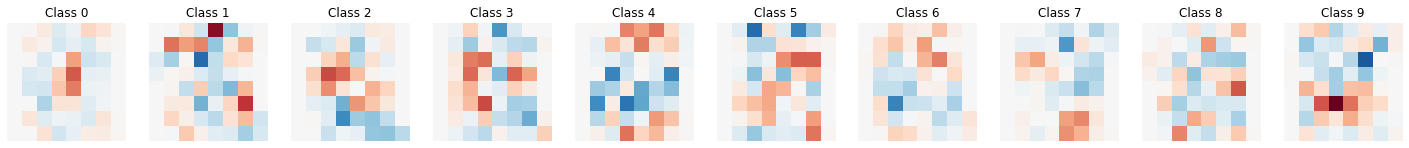

In [14]:
scale = np.max(np.abs(logreg.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(logreg.coef_[i].reshape(8, 8),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);